In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Zomato.csv")

In [3]:
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [4]:
df.rename(columns={'approx_cost(for two people)':'cost'}, inplace=True)

In [5]:
print(df.isnull().sum())

name               0
online_order       0
book_table         0
rate               0
votes              0
cost               0
listed_in(type)    0
dtype: int64


In [6]:
print(df.describe())

             rate        votes        cost
count  148.000000   148.000000  148.000000
mean     3.633108   264.810811  418.243243
std      0.402271   653.676951  223.085098
min      2.600000     0.000000  100.000000
25%      3.300000     6.750000  200.000000
50%      3.700000    43.500000  400.000000
75%      3.900000   221.750000  600.000000
max      4.600000  4884.000000  950.000000


online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64


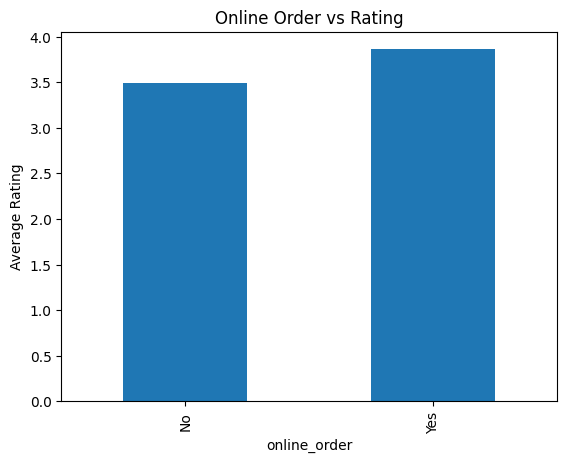

In [7]:
online_rating = df.groupby('online_order')['rate'].mean()
print(online_rating)

online_rating.plot(kind='bar', title="Online Order vs Rating")
plt.ylabel("Average Rating")
plt.show()

book_table
No     3.601429
Yes    4.187500
Name: rate, dtype: float64


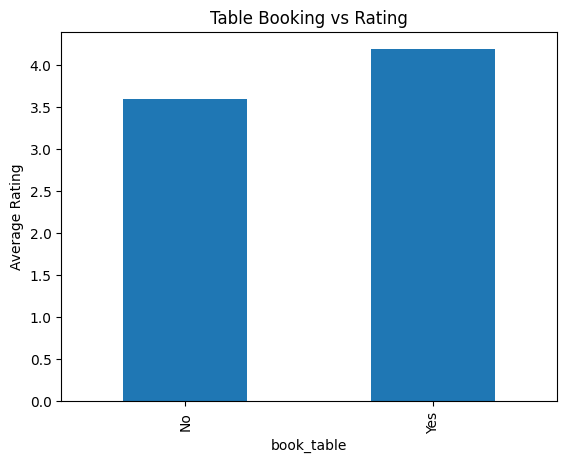

In [8]:
table_rating = df.groupby('book_table')['rate'].mean()
print(table_rating)

table_rating.plot(kind='bar', title="Table Booking vs Rating")
plt.ylabel("Average Rating")
plt.show()


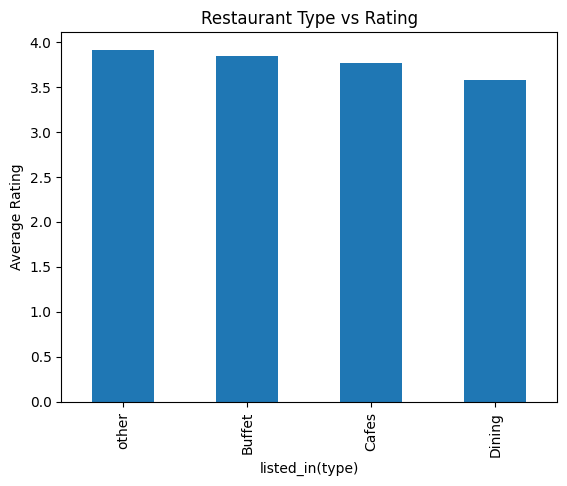

In [9]:
type_rating = df.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

type_rating.plot(kind='bar', title="Restaurant Type vs Rating")
plt.ylabel("Average Rating")
plt.show()

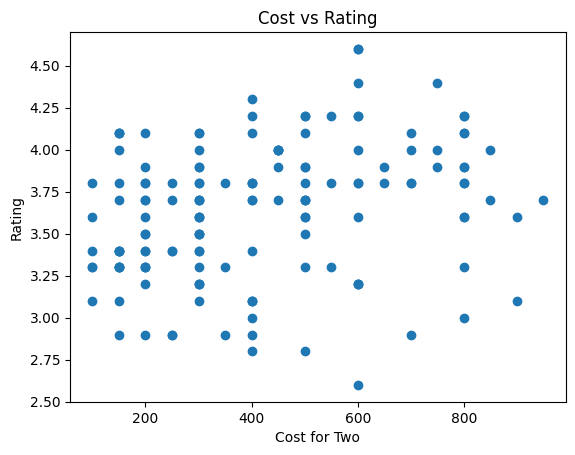

In [10]:
plt.scatter(df['cost'], df['rate'])
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.title("Cost vs Rating")
plt.show()

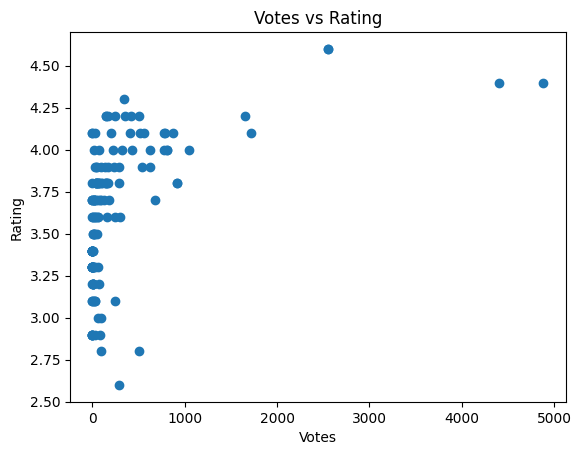

In [11]:
plt.scatter(df['votes'], df['rate'])
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Votes vs Rating")
plt.show()

In [12]:
top_restaurants = df.sort_values(by='rate', ascending=False).head(10)
print(top_restaurants[['name','rate','votes','cost']])

                      name  rate  votes  cost
7                   Onesta   4.6   2556   600
44                  Onesta   4.6   2556   600
38       Empire Restaurant   4.4   4884   750
86           Meghana Foods   4.4   4401   600
52  Corner House Ice Cream   4.3    345   400
57                  Wamama   4.2    354   800
60           Peppy Peppers   4.2    244   800
81           Frozen Bottle   4.2    146   400
34                  Faasos   4.2    415   500
12        The Coffee Shack   4.2    164   500
